In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.utils import to_time_series_dataset
from tslearn import metrics

In [145]:
# import json

# with open('scholar_citation_trend.jsonl', 'r') as json_file:
#     json_list = list(json_file)

# for json_str in json_list:
#     result = json.loads(json_str)
    
    
# proto_names = [
#     #1a
#     "Geoffrey Hinton",
#     "Kristina Toutanova",
#     "Ming-Wei Chang",
#     "Leon Bottou",
#     # 1b
#     "Peter Prettenhofer",
#     "Kaiming He",
#     "Danqi Chen",
#     "Li Fei-Fei",
#     #2
#     "Wei-Ying Ma",
#     "Diana Maynard",
#     "Tim Finin",
#     "Sara Borroni",
#     #3
#     "Chris Pal",
#     "Ming Li",
#     "Marti A Hearst",
#     "Jingdan Zhang",
# ]

# proto_citations = np.empty(len(proto_names), dtype=object)

# for json_str in json_list:
#     result = json.loads(json_str)
#     if result["name"] in proto_names:
#         cites = np.asarray(
#                 list(result['citation_trend'].values())
#             ).astype(int)
#         if len(cites) > 0:
#             proto_citations[
#                     proto_names.index(result["name"])
#                 ] = cites

In [150]:
# # construct prototypes
# proto_names = [
#     ""
# ]

# proto_x = np.arange(1, 11)
# proto_y = np.asarray([
#     proto_x**2,
#     proto_x**8,
#     -(np.abs(np.median(proto_x) - proto_x))**2,
# ])

# proto_y -= np.min(proto_y, axis=1)
# proto_y /= np.max(proto_y, axis=1)

In [179]:
proto_names = [
    #1a
#     "Geoffrey Hinton",
#     "Kristina Toutanova",
#     "Ming-Wei Chang",
    "Leon Bottou",
    # 1b
    "Peter Prettenhofer",
#     "Kaiming He",
#     "Danqi Chen",
#     "Li Fei-Fei",
    #2
    "Wei-Ying Ma",
#     "Diana Maynard",
#     "Tim Finin",
#     "Sara Borroni",
    #3
    "Chris Pal",
    "Ming Li",
#     "Marti A Hearst",
#     "Jingdan Zhang",
]

proto_cites = np.asarray([
    [287, 343, 464, 681, 697, 806, 999, 1126, 1282, 1449, 1968, 2705, 4364, 6787, 9774, 14178, 17552, 19651, 20770],
    [148, 421, 873, 1652, 2637, 4108, 6445, 9006, 11856, 15154],
    [170, 237, 273, 358, 498, 645, 979, 1318, 1664, 2121, 2585, 2967, 3370, 3389, 3841, 4127, 4011, 3952, 3512, 3352, 3239, 3150, 3000, 2731],
    [180, 354, 580, 916, 1240, 1795, 2205, 2703, 3187, 3010, 2883, 2958, 3090, 3023, 3221, 3370, 4201, 4893, 5637, 5696, 5628],
    [98, 98, 101, 203, 203, 261, 298, 267, 280, 347, 324, 345, 421, 525, 1176, 1466, 1683, 1726, 1927, 1896, 1684, 1904, 1851, 1715, 1650, 1593, 1475, 1432, 1310, 1381, 1316, 1458, 1569]
])

proto_cites = [np.asarray(pc) / max(pc) for pc in proto_cites]

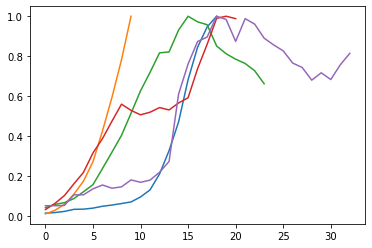

In [180]:
n_years = max([len(pc) for pc in proto_cites])
for cites in proto_cites:
    plt.plot(np.arange(len(cites)), cites)

In [244]:
# Load
with open('years.pkl', 'rb') as y, open("cites.pkl", 'rb') as c:
    X = np.asarray(pickle.load(y))
    y = np.asarray(pickle.load(c))
    
    # Remove small lists
#     idx = np.where(np.asarray([len(x) for x in X]) > 4)[0]
#     X = X[idx]
#     y = y[idx]
    
    y = y[0:100]
    X = X[0:100]

In [245]:
# Preprocess shape
y_normed = [np.asarray(cites) / max(cites) for cites in y]

In [246]:
proto_ts = to_time_series_dataset(proto_cites)
y_ts = to_time_series_dataset(y_normed)

In [247]:
# learn similarity matrix (higher means closer)
# cdist_soft_dtw
sim_mat = metrics.cdist_dtw(y_ts, proto_ts)
posteriors = np.zeros((sim_mat.shape[0], 4))
posteriors[:, :3] = sim_mat[:, :3]
posteriors[:, 3] = np.max(sim_mat[:, 3:5], 1)
posteriors = posteriors / np.sum(posteriors, 1, keepdims=True)

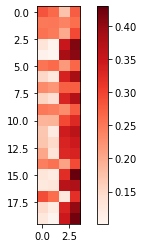

In [248]:
plt.imshow(posteriors[20:40], cmap='Reds')
plt.colorbar()

In [249]:
np.max(posteriors, 0)

array([0.30541045, 0.31084167, 0.40367869, 0.44204986])

In [250]:
labels = np.argmax(posteriors, 1)

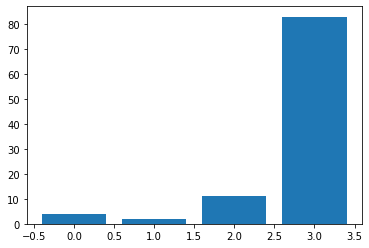

In [251]:
plt.bar(*np.unique(labels, return_counts=True))
plt.show()

## Plot clusters

In [252]:
maxLength = max(len(x) for x in X)
processed_y = []
processed_X = []
for i in range(len(y)):
    interpolated_X = np.linspace(X[i][0], X[i][-1], maxLength)
    processed_X.append(interpolated_X)
    interpolated_y = []
    processed_y.append(np.interp(interpolated_X, X[i], y_normed[i]))

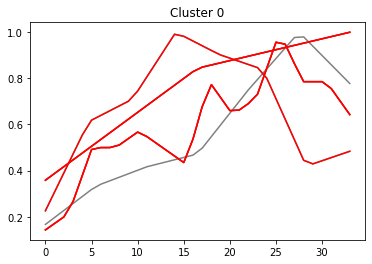

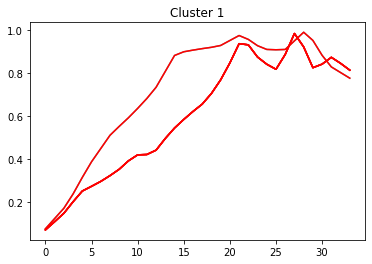

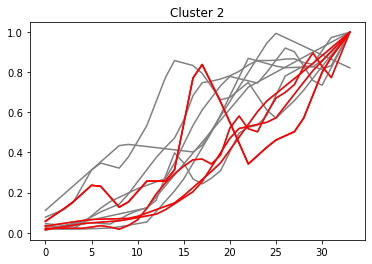

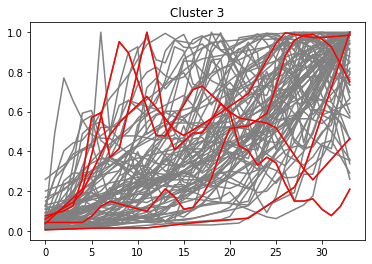

In [253]:
ts_indices = np.arange(maxLength)

for label in np.unique(labels):
    idx = np.where(labels == label)[0]
    
    plt.plot(ts_indices, np.asarray(processed_y)[idx].T, color='gray')
    
    sub_idx = np.random.choice(idx, 5)
    plt.plot(ts_indices, np.asarray(processed_y)[sub_idx].T, color='red')
    plt.title(f'Cluster {label}')
    plt.show()